# Data Analysis on Student Performance in Exams

### Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Impoting the dataset

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Data Visualization

In [5]:
gender = df['gender'].value_counts()
gender

female    518
male      482
Name: gender, dtype: int64

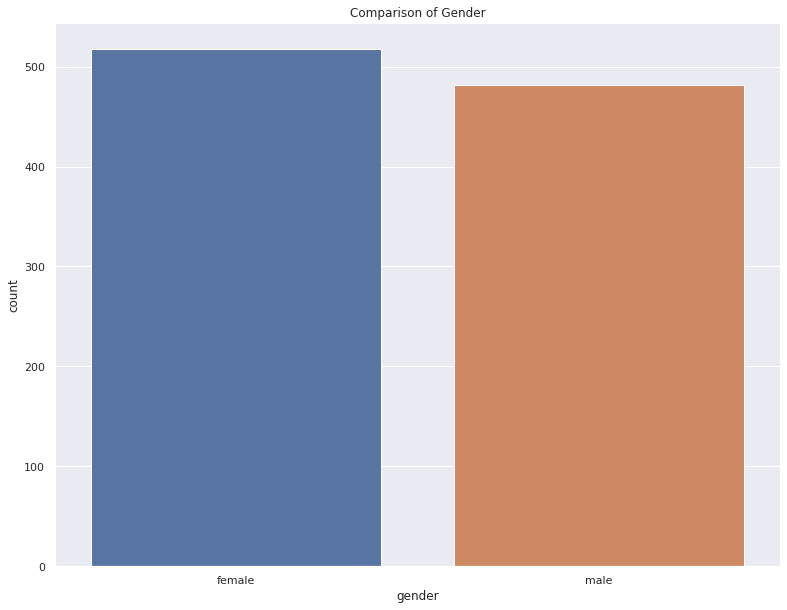

In [6]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='gender', data=df)
plt.title('Comparison of Gender')
plt.show()

In [7]:
race = df['race/ethnicity'].value_counts()
race

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

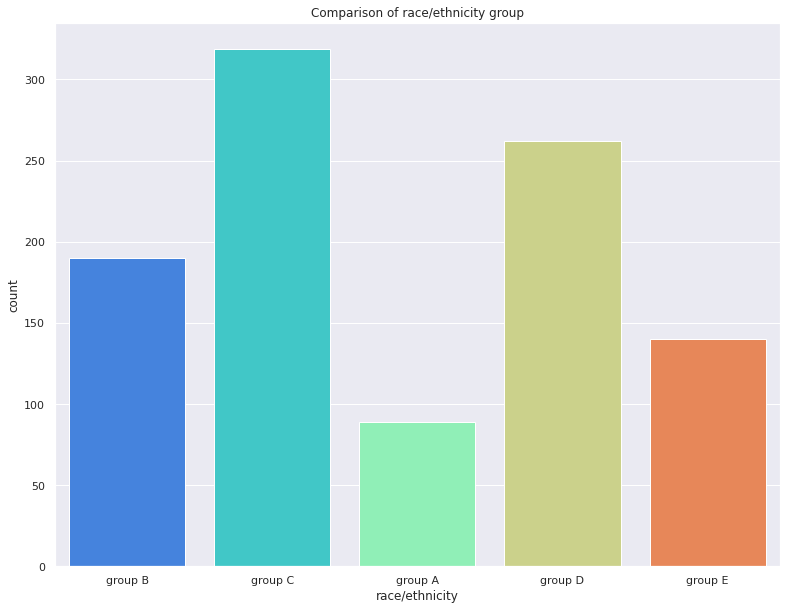

In [8]:
plt.figure(figsize=(13, 10))
sns.countplot(x='race/ethnicity', data=df, palette='rainbow')
plt.title('Comparison of race/ethnicity group')
plt.show()

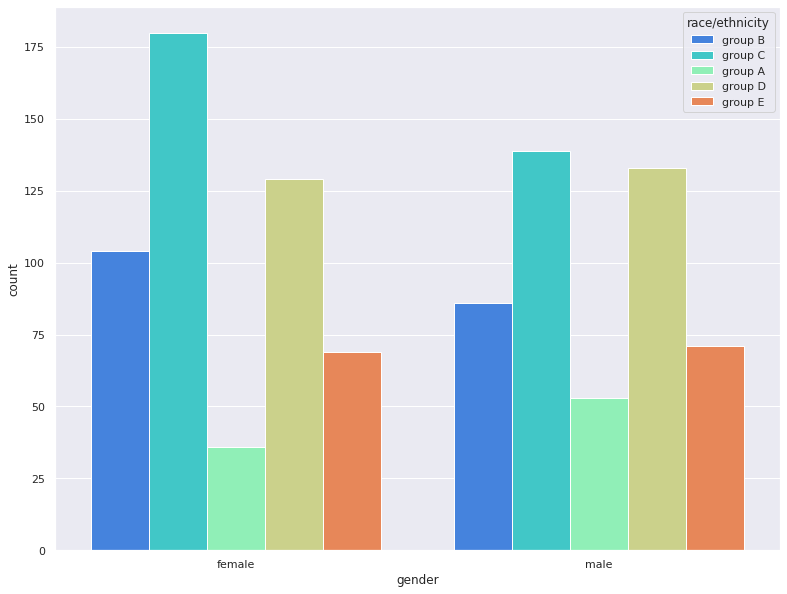

In [9]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='gender', hue='race/ethnicity', data=df, palette='rainbow')
plt.show()

In [10]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

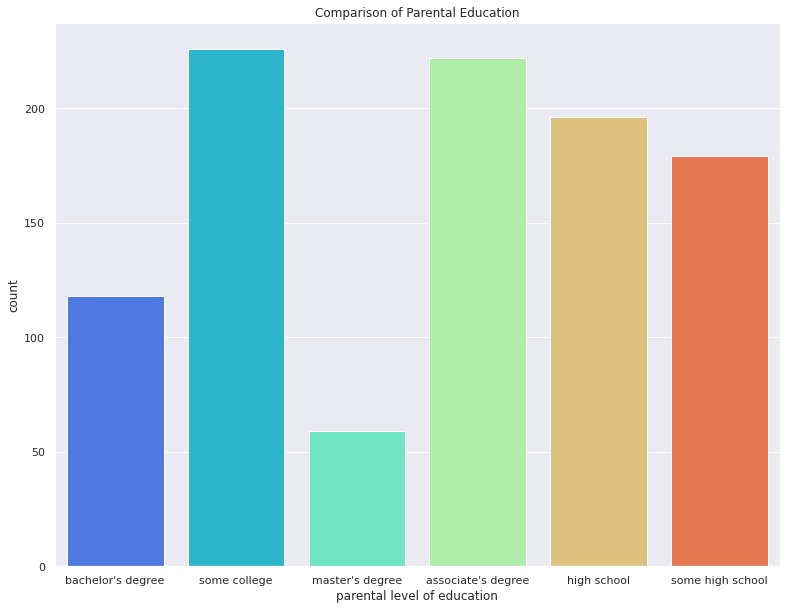

In [11]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='parental level of education', data=df, palette='rainbow')
plt.title('Comparison of Parental Education')
plt.show()

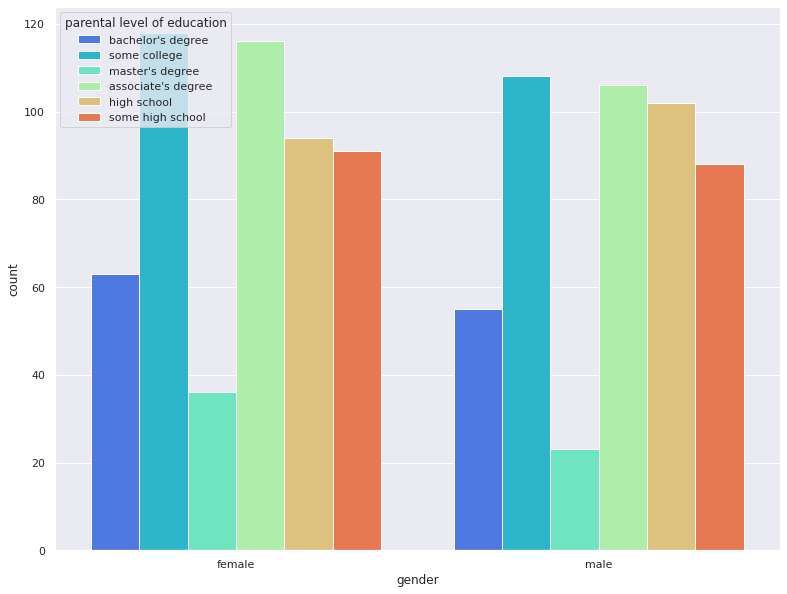

In [12]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='gender', hue='parental level of education', data=df, palette='rainbow')
plt.show()

In [13]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

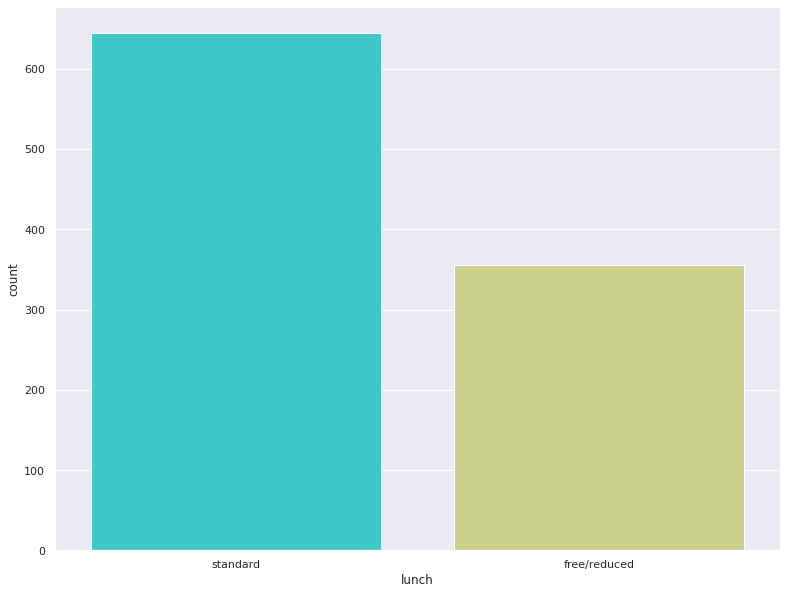

In [14]:
sns.countplot(x='lunch', data=df, palette='rainbow')
plt.show()

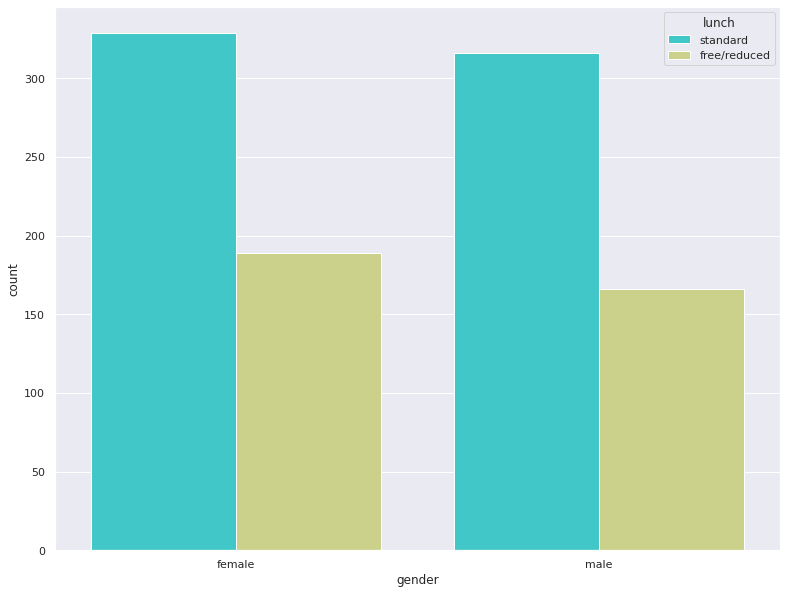

In [15]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='gender', hue='lunch', data=df, palette='rainbow')
plt.show()

In [16]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

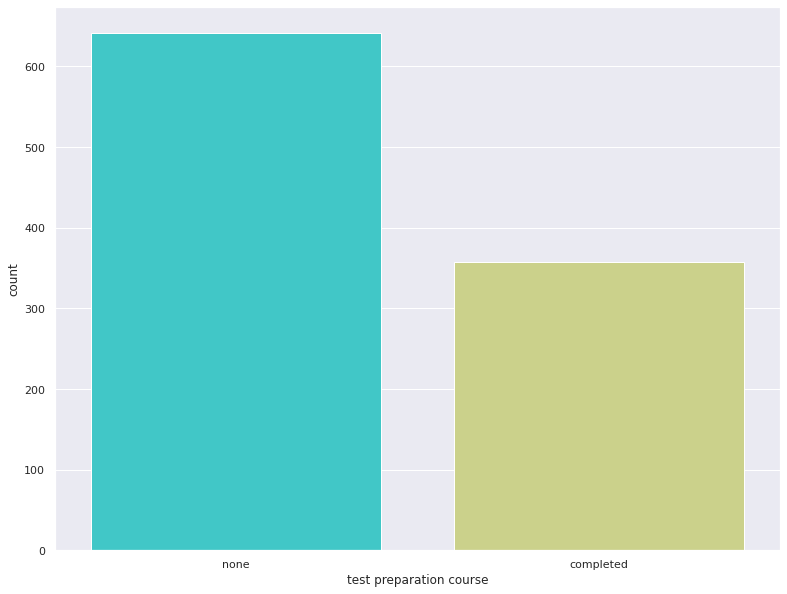

In [17]:
sns.countplot(x='test preparation course', data=df, palette='rainbow')
plt.show()

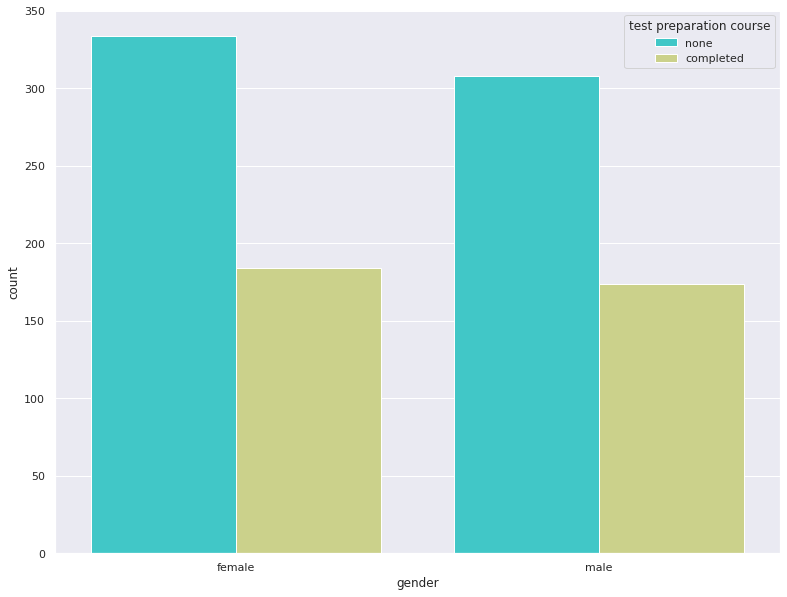

In [18]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='gender', hue='test preparation course', data=df, palette='rainbow')
plt.show()

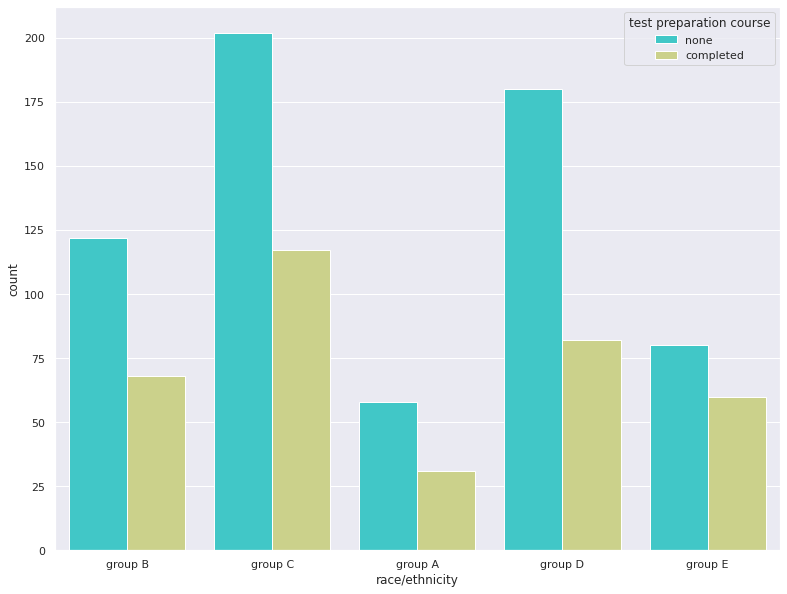

In [19]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.countplot(x='race/ethnicity', hue='test preparation course', data=df, palette='rainbow')
plt.show()

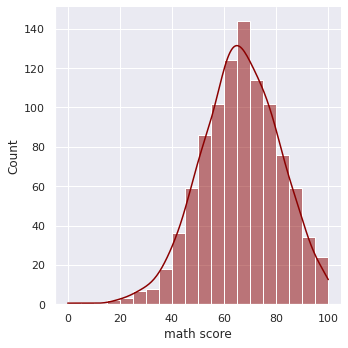

In [20]:
sns.displot(df['math score'].dropna(), kde=True, color='darkred', bins=20)

plt.show()

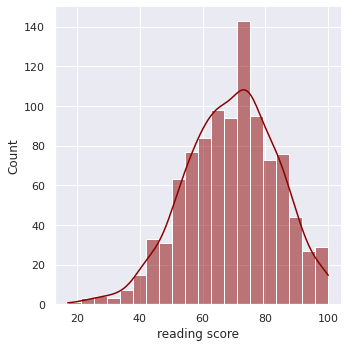

In [21]:
sns.displot(df['reading score'].dropna(), kde=True, color='darkred', bins=20)
plt.show()

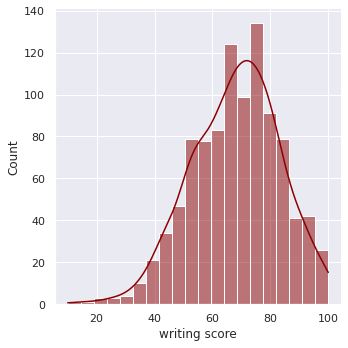

In [22]:
sns.displot(df['writing score'].dropna(), kde=True, color='darkred', bins=20)
plt.show()

 ## Outliers

In [23]:
## Let's take the sample seed so that everytime the random values come out to be constant
np.random.seed(42)

## Lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a = df['math score'], size = 100)
## Getting the sample mean
print("Sample mean for math scores: ", sample_math_marks.mean())
## Getting the population mean
print("Population mean for math scores: ", df['math score'].mean())


## Lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a = df['reading score'], size = 100)
## Getting the sample mean
print("\nSample mean for math scores: ", sample_reading_marks.mean())
## Getting the population mean
print("Population mean for reading scores: ", df['reading score'].mean())


## Lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a = df['writing score'], size = 100)
## Getting the sample mean
print("\nSample mean for math scores: ", sample_writing_marks.mean())
## Getting the population mean
print("Population mean for writing scores: ", df['writing score'].mean())

Sample mean for math scores:  68.52
Population mean for math scores:  66.089

Sample mean for math scores:  68.24
Population mean for reading scores:  69.169

Sample mean for math scores:  67.35
Population mean for writing scores:  68.054


## Let check the Confidence Interval for Math Score

In [24]:
## Lets import the scipy package
import scipy.stats as stats
import math

## Lets seed the random values
np.random.seed(42)


## Lets take a sample size
sample_size = 100
sample = np.random.choice(a = df['math score'], size = sample_size)
sample_mean = sample.mean()

## Getting the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

## Check the z-critical value
print('Z-critical value: ', z_critical)

## Get the population standard deviation
pop_stdev = df['math score'].std()

## Checking the margin of the error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

## Defining our confidence level
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

## Let's print the results
print("Confidence interval: ", end=" ")
print(confidence_interval)
print("True mean: {}".format(df['math score'].mean()))

Z-critical value:  1.6448536269514722
Confidence interval:  (66.02589527083231, 71.01410472916768)
True mean: 66.089


## Let check the Confidence Interval for Reading Score

In [25]:
## Lets import the scipy package
import scipy.stats as stats
import math

## Lets seed the random values
np.random.seed(42)


## Lets take a sample size
sample_size = 100
sample = np.random.choice(a = df['reading score'], size = sample_size)
sample_mean = sample.mean()

## Getting the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

## Check the z-critical value
print('Z-critical value: ', z_critical)

## Get the population standard deviation
pop_stdev = df['reading score'].std()

## Checking the margin of the error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

## Defining our confidence level
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

## Let's print the results
print("Confidence interval: ", end=" ")
print(confidence_interval)
print("True mean: {}".format(df['reading score'].mean()))

Z-critical value:  1.6448536269514722
Confidence interval:  (68.3784821337823, 73.1815178662177)
True mean: 69.169


## Let check the Confidence Interval for Writing Score

In [26]:
## Lets import the scipy package
import scipy.stats as stats
import math

## Lets seed the random values
np.random.seed(42)


## Lets take a sample size
sample_size = 100
sample = np.random.choice(a = df['writing score'], size = sample_size)
sample_mean = sample.mean()

## Getting the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

## Check the z-critical value
print('Z-critical value: ', z_critical)

## Get the population standard deviation
pop_stdev = df['writing score'].std()

## Checking the margin of the error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

## Defining our confidence level
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

## Let's print the results
print("Confidence interval: ", end=" ")
print(confidence_interval)
print("True mean: {}".format(df['writing score'].mean()))

Z-critical value:  1.6448536269514722
Confidence interval:  (67.52053684517605, 72.51946315482394)
True mean: 68.054


## Feature engineering on the data to visualize and solve the dataset more accurately

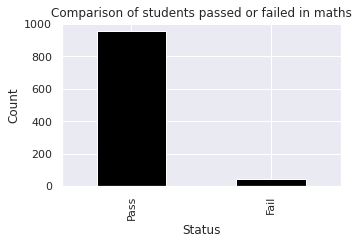

In [27]:
## Setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize = (15, 8))
passmarks = 40

## Creating a new column pass_math this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score'] < passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts(dropna=False).plot.bar(color = 'black', figsize=(5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

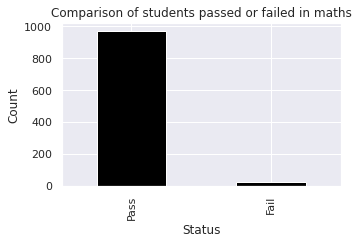

In [28]:
## Setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize = (15, 8))
passmarks = 40

## Creating a new column pass_reading this column will tell us whether the students are pass or fail
df['pass_reading'] = np.where(df['reading score'] < passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna=False).plot.bar(color = 'black', figsize=(5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

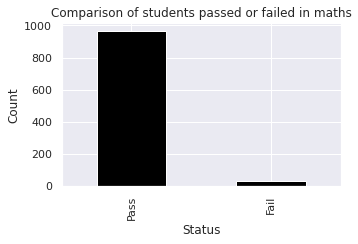

In [29]:
## Setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize = (15, 8))
passmarks = 40

## Creating a new column pass_writing, this column will tell us whether the students are pass or fail
df['pass_writing'] = np.where(df['writing score'] < passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna=False).plot.bar(color = 'black', figsize=(5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

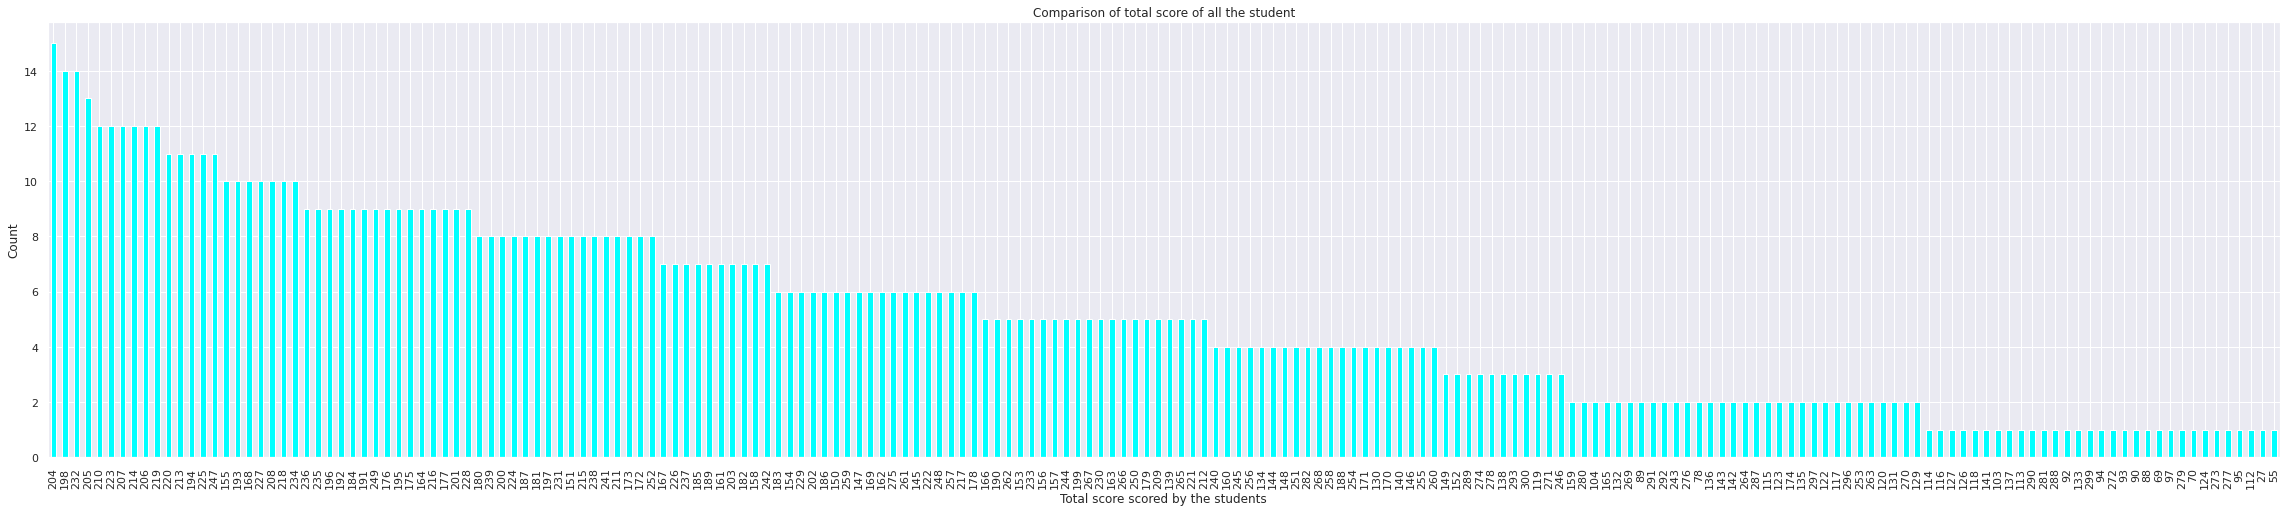

In [30]:
## Computing the total score for each students
plt.subplots(figsize=(15, 8))
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['total_score'].value_counts(normalize=True)
df['total_score'].value_counts(dropna=True).plot.bar(color='cyan', figsize=(40, 8))

plt.title('Comparison of total score of all the student')
plt.xlabel('Total score scored by the students')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_35094/187597858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'][i] = ceil(df['percentage'][i])


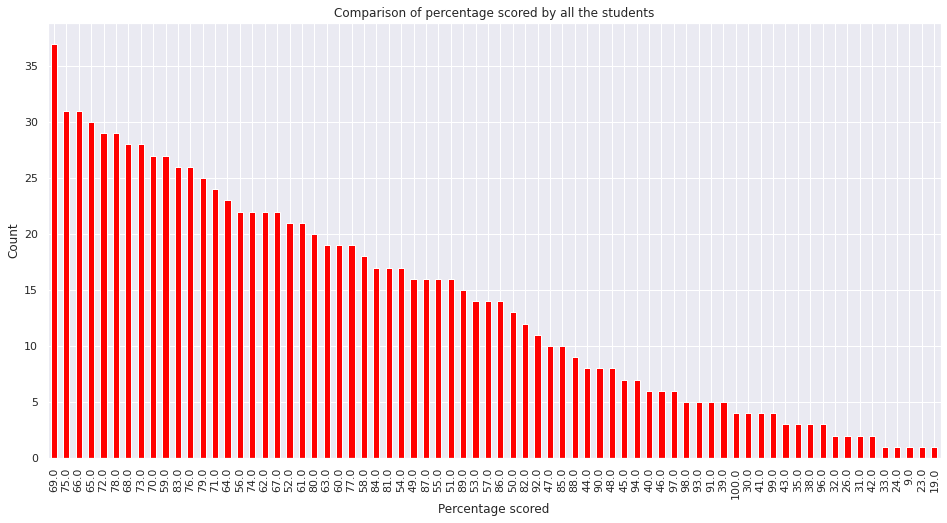

In [31]:
## Computing percentage for each students 
## Importing math library to use ceil
from math import *

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])
    
df['percentage'].value_counts(normalize=True)
df['percentage'].value_counts(dropna=True).plot.bar(color='red', figsize=(16, 8))

plt.title("Comparison of percentage scored by all the students")
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

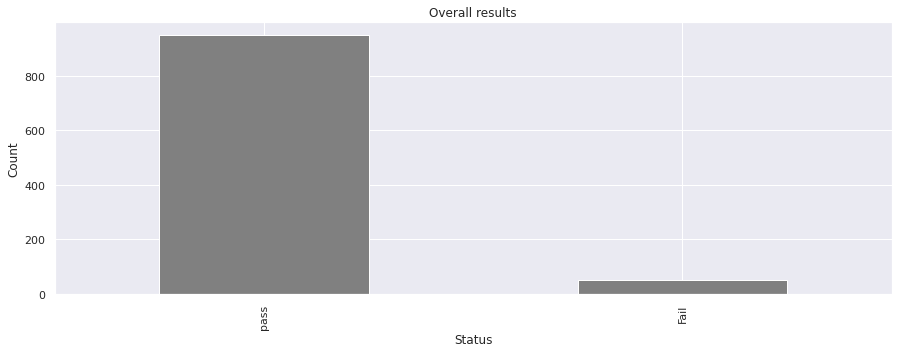

In [32]:
## Checking which student is fail overall
df['status'] = df.apply(lambda x: 'Fail' if x['pass_math'] == 'Fail' or
                       x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                       else 'pass', axis = 1)

df['status'].value_counts(dropna=False).plot.bar(color='gray', figsize=(15, 5))
plt.title("Overall results")
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

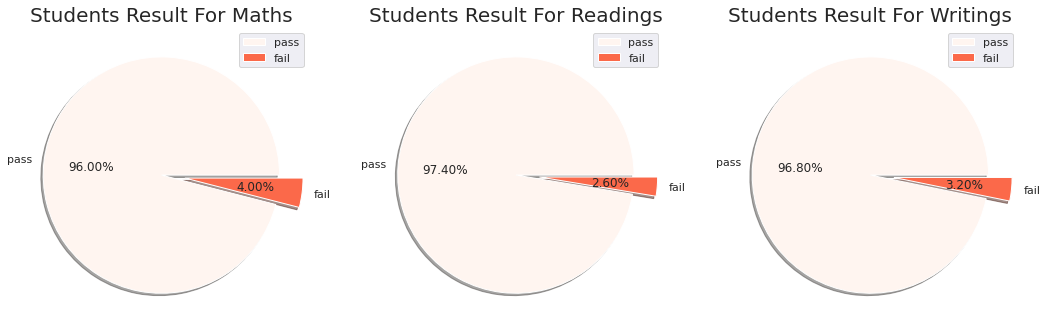

In [33]:
## Setting a passing mark for the students to pass on the three subjects individually
passmarkers = 40
plt.rcParams['figure.figsize'] = (18, 12)

## Pie Chart to represent the ratio of pass and fail status between the students
size = df['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels=labels, autopct='%.2f%%', explode = explode, shadow=True)
plt.title('Students Result For Maths', fontsize=20)
plt.legend()

size = df['pass_reading'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels=labels, autopct='%.2f%%', explode = explode, shadow=True)
plt.title('Students Result For Readings', fontsize=20)
plt.legend()

size = df['pass_writing'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels=labels, autopct='%.2f%%', explode = explode, shadow=True)
plt.title('Students Result For Writings', fontsize=20)
plt.legend()
plt.show()

## Assigning grades to the students according to the following criteria:
* 0 - 40 marks : grade E
* 41 - 60 marks: grade D
* 61 - 70 marks: grade C
* 71 - 80 marks: grade B
* 81 - 90 marks: grade A
* 91 - 100 marks: grade O

In [34]:
def getgrade(percentage, status):
    if status == 'Fail':
        return 'E'
    if (percentage >= 90):
        return 'O'
    if (percentage >= 80):
        return 'A'
    if (percentage >= 70):
        return 'B'
    if (percentage >= 60):
        return 'C'
    if (percentage >= 40):
        return 'D'
    else:
        return 'E'
    
df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis=1)
df['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

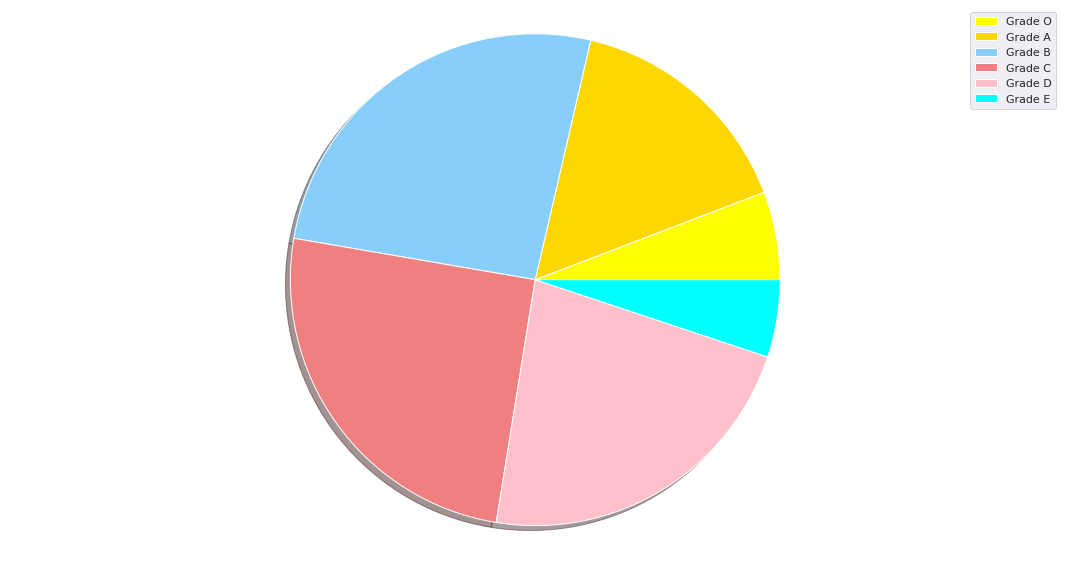

In [35]:
## Plotting a pie chart for the distribution of various grades among the students
plt.subplots(figsize = (15, 8))
labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 225, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts= plt.pie(sizes, colors=colors, shadow=True, startangle=0, explode=explode)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

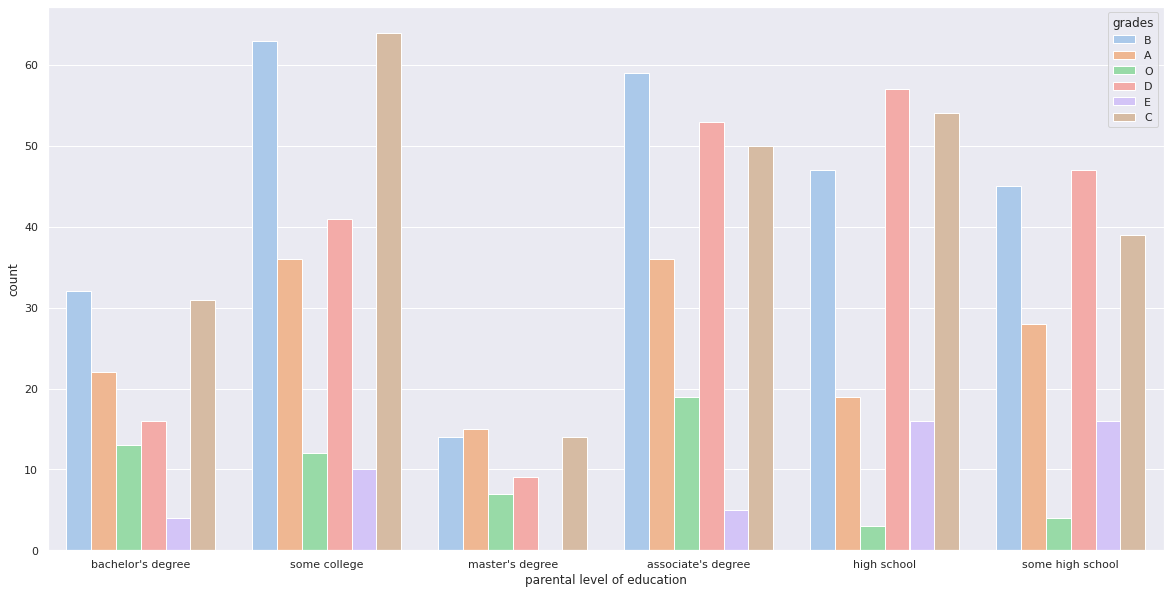

In [36]:
## For better visualization, we will plot it again using seaborn
plt.subplots(figsize=(20, 10))
sns.countplot(x=df['parental level of education'], hue=df['grades'], data=df, palette='pastel')
plt.show()

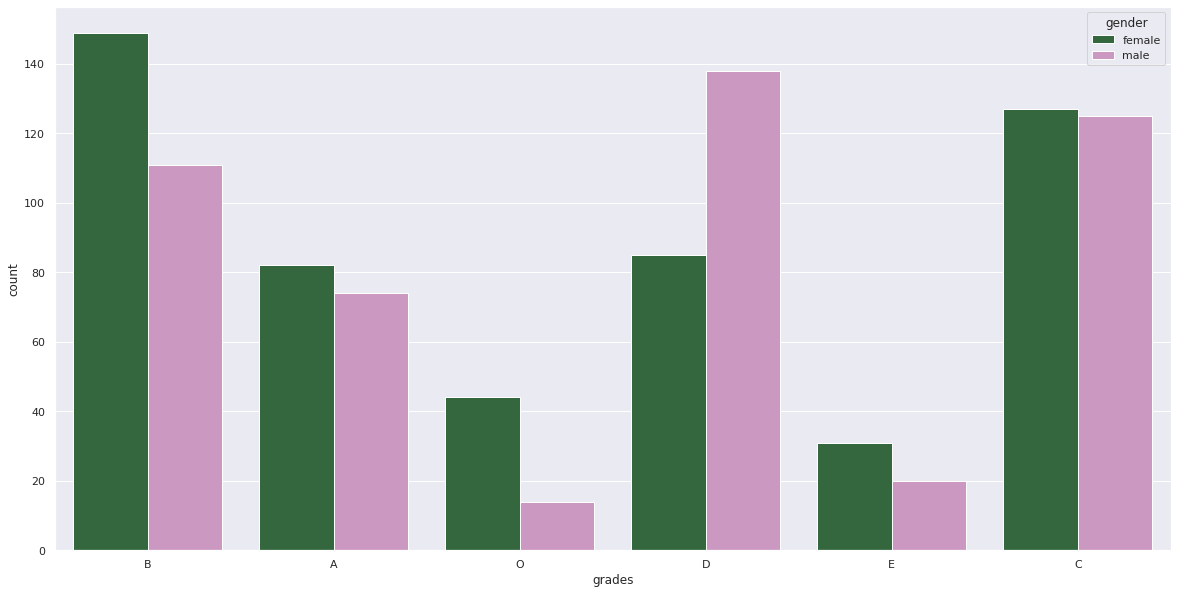

In [37]:
## Comparing the distribution of grades among males and females
plt.subplots(figsize=(20, 10))
sns.countplot(x=df['grades'], hue=df['gender'], data=df, palette='cubehelix')
plt.show()

## Heatmap

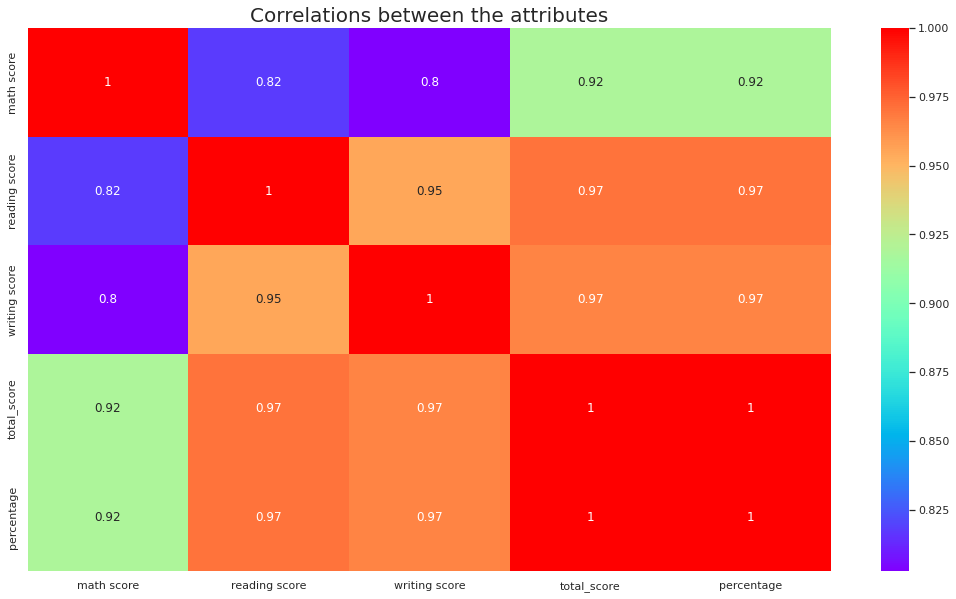

In [38]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.heatmap(df.corr(), cmap = 'rainbow', annot=True)
plt.title('Correlations between the attributes', fontsize=20)
plt.show()

# Data Preprocessing

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Label encodeing for test preparation cource
df['test preparation course'] = le.fit_transform(df['test preparation course'])

## Label encoding for lunch
df['lunch'] = le.fit_transform(df['lunch'])

In [40]:
## Label encoding for race/ethnicity
## We have to map values to each of the categories

df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)
df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [41]:
## Label encode for parental level of education
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [42]:
## Label encode for gender
df['gender'] = le.fit_transform(df['gender'])

## Label encoding for pass_math
df['pass_math'] = le.fit_transform(df['pass_math'])

## Label encoding for pass_reading
df['pass_reading'] = le.fit_transform(df['pass_reading'])

## Label encoding for pass_writing
df['pass_writing'] = le.fit_transform(df['pass_writing'])

## Label encoding for status
df['status'] = le.fit_transform(df['status'])

In [43]:
## Label encoding for grades
## We have to map values to each of the categories

df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)
df['grades'].value_counts()

2    260
3    252
4    223
1    156
0     58
5     51
Name: grades, dtype: int64

## Splitting the independent and dependent variables i.e. X and y

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   pass_math                    1000 non-null   int64  
 9   pass_reading                 1000 non-null   int64  
 10  pass_writing                 1000 non-null   int64  
 11  total_score                  1000 non-null   int64  
 12  percentage                   1000 non-null   float64
 13  status             

In [45]:
X = df.iloc[:, :14]
y = df.iloc[:, 14]
print(X.shape)
print(y.shape)

(1000, 14)
(1000,)


## Now splitting the data into training and test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [47]:
## Fitting the data into scalar
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [48]:
## Fitting the Random Forest Classifier to the training data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_preds = model.predict(X_test)
y_preds

array([3, 4, 3, 4, 0, 4, 2, 2, 5, 3, 5, 3, 2, 4, 4, 4, 2, 4, 4, 4, 4, 3,
       2, 4, 2, 4, 1, 4, 5, 3, 4, 2, 5, 0, 4, 2, 2, 1, 1, 4, 3, 3, 3, 4,
       3, 3, 4, 3, 4, 3, 3, 4, 4, 2, 3, 1, 0, 2, 3, 2, 0, 4, 4, 4, 2, 3,
       5, 3, 4, 4, 4, 1, 4, 4, 3, 2, 2, 4, 3, 4, 3, 4, 4, 3, 4, 4, 2, 4,
       5, 4, 3, 2, 4, 4, 3, 4, 4, 4, 4, 1, 4, 3, 3, 2, 3, 4, 3, 4, 2, 4,
       4, 1, 2, 2, 3, 4, 0, 4, 4, 3, 3, 4, 5, 3, 5, 3, 2, 4, 2, 3, 4, 1,
       4, 4, 3, 1, 3, 4, 4, 2, 4, 4, 1, 4, 2, 3, 3, 4, 2, 4, 4, 4, 3, 3,
       3, 3, 2, 2, 1, 3, 4, 4, 4, 4, 4, 1, 3, 5, 4, 1, 3, 3, 4, 1, 4, 5,
       3, 3, 2, 2, 3, 0, 3, 4, 4, 3, 3, 3, 5, 4, 4, 5, 4, 2, 4, 0, 3, 3,
       4, 4, 4, 4, 4, 5, 3, 0, 3, 4, 5, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 3,
       2, 4, 2, 3, 4, 2, 1, 5, 5, 2, 4, 3, 2, 1, 3, 2, 4, 4, 4, 4, 3, 3,
       2, 2, 4, 4, 0, 3, 2, 4])

In [50]:
## Now calculating the accuracy
print('Training accuracy: ', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  0.584


<AxesSubplot:>

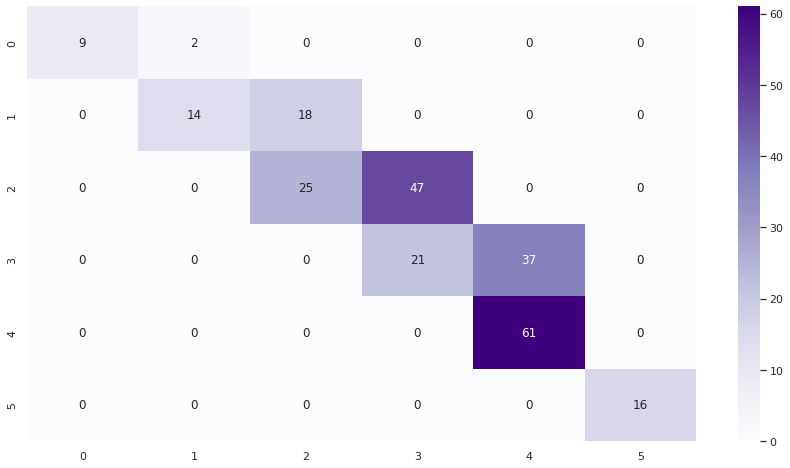

In [51]:
## Printing the confusion matrics
plt.subplots(figsize=(15, 8))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)

## printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot=True, cmap='Purples')

In [52]:
## Classification report
from sklearn.metrics import classification_report

sr = classification_report(y_test, y_preds)
print(sr)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.88      0.44      0.58        32
           2       0.58      0.35      0.43        72
           3       0.31      0.36      0.33        58
           4       0.62      1.00      0.77        61
           5       1.00      1.00      1.00        16

    accuracy                           0.58       250
   macro avg       0.73      0.66      0.67       250
weighted avg       0.61      0.58      0.57       250

